<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/Project_Text_Mining_and_Social_Network_Analysis_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
source_path = '/content/drive/My Drive/Bootcamp-DS/Module3/data/project/'

# Generate CSV

## Load json

In [4]:
# prompt: dame un ejemplo para leer un json en diccionario

import json

with open(source_path + 'cafe_de_tere.json') as f:
  data = json.load(f)

data['tweets'][:2]


[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Nov 08 00:38:50 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 148085509,
     'id_str': '148085509',
     'indices': [3, 18],
     'name': 'Joaquín Saavedra',
     'screen_name': 'joacosaavedraq'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 1192602342434234371,
  'id_str': '1192602342434234371',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'es',
  'place': None,
  'retweet_count': 18,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,
   'created_at': 'Wed Nov 06 21:48:16 +0000 2019',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [{'display_url': 'twitter.com/i/web/status/1…',
      'expanded_url': 'https://twitter.co

## Understanding the data

In [5]:
#@title Example of the content of one of the tweets.
"""
        {
            "contributors": null,
            "coordinates": null,
            "created_at": "Fri Nov 08 00:38:50 +0000 2019",
            "entities": {
                "hashtags": [],
                "symbols": [],
                "urls": [],
                "user_mentions": [
                    {
                        "id": 148085509,
                        "id_str": "148085509",
                        "indices": [
                            3,
                            18
                        ],
                        "name": "Joaqu\u00edn Saavedra",
                        "screen_name": "joacosaavedraq"
                    }
                ]
            },
            "favorite_count": 0,
            "favorited": false,
            "geo": null,
            "id": 1192602342434234371,
            "id_str": "1192602342434234371",
            "in_reply_to_screen_name": null,
            "in_reply_to_status_id": null,
            "in_reply_to_status_id_str": null,
            "in_reply_to_user_id": null,
            "in_reply_to_user_id_str": null,
            "is_quote_status": false,
            "lang": "es",
            "place": null,
            "retweet_count": 18,
            "retweeted": false,
            "retweeted_status": {
                "contributors": null,
                "coordinates": null,
                "created_at": "Wed Nov 06 21:48:16 +0000 2019",
                "entities": {
                    "hashtags": [],
                    "symbols": [],
                    "urls": [
                        {
                            "display_url": "twitter.com/i/web/status/1\u2026",
                            "expanded_url": "https://twitter.com/i/web/status/1192197028559937544",
                            "indices": [
                                117,
                                140
                            ],
                            "url": "https://t.co/4AfTqVPVRq"
                        }
                    ],
                    "user_mentions": []
                },
                "favorite_count": 86,
                "favorited": false,
                "geo": null,
                "id": 1192197028559937544,
                "id_str": "1192197028559937544",
                "in_reply_to_screen_name": null,
                "in_reply_to_status_id": null,
                "in_reply_to_status_id_str": null,
                "in_reply_to_user_id": null,
                "in_reply_to_user_id_str": null,
                "is_quote_status": false,
                "lang": "es",
                "place": null,
                "possibly_sensitive": false,
                "possibly_sensitive_appealable": false,
                "retweet_count": 18,
                "retweeted": false,
                "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
                "text": "Larga vida al bol\u00f3n mixto de maduro de Tere. En la vida siempre est\u00e1n los que se quedan criticando y los que dan el\u2026 https://t.co/4AfTqVPVRq",
                "truncated": true,
                "user": {
                    "can_media_tag": true,
                    "contributors_enabled": false,
                    "created_at": "Tue May 25 20:13:42 +0000 2010",
                    "default_profile": false,
                    "default_profile_image": false,
                    "description": "Periodista Deportivo: Fan\u00e1tico Ecuadortv, @f_sin_cassette , \u201dAl Toque\u201d Radio Caravana, \u201cMinuto Cero\u201d Diblu, DT infanto juvenil @campusatfa, \u00e1rbitro (2017)",
                    "entities": {
                        "description": {
                            "urls": []
                        },
                        "url": {
                            "urls": [
                                {
                                    "display_url": "youtu.be/6PnBIHvHd-8",
                                    "expanded_url": "https://youtu.be/6PnBIHvHd-8",
                                    "indices": [
                                        0,
                                        23
                                    ],
                                    "url": "https://t.co/ZPoJfNK3Dd"
                                }
                            ]
                        }
                    },
                    "favourites_count": 3834,
                    "follow_request_sent": false,
                    "followed_by": false,
                    "followers_count": 8647,
                    "following": true,
                    "friends_count": 1103,
                    "geo_enabled": false,
                    "has_extended_profile": true,
                    "id": 148085509,
                    "id_str": "148085509",
                    "is_translation_enabled": false,
                    "is_translator": false,
                    "lang": null,
                    "listed_count": 34,
                    "location": "Guayaquil",
                    "name": "Joaqu\u00edn Saavedra",
                    "notifications": false,
                    "profile_background_color": "131516",
                    "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif",
                    "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif",
                    "profile_background_tile": true,
                    "profile_banner_url": "https://pbs.twimg.com/profile_banners/148085509/1572558455",
                    "profile_image_url": "http://pbs.twimg.com/profile_images/1191573757367848961/mPKmegYW_normal.jpg",
                    "profile_image_url_https": "https://pbs.twimg.com/profile_images/1191573757367848961/mPKmegYW_normal.jpg",
                    "profile_link_color": "009999",
                    "profile_sidebar_border_color": "EEEEEE",
                    "profile_sidebar_fill_color": "EFEFEF",
                    "profile_text_color": "333333",
                    "profile_use_background_image": true,
                    "protected": false,
                    "screen_name": "joacosaavedraq",
                    "statuses_count": 23008,
                    "time_zone": null,
                    "translator_type": "none",
                    "url": "https://t.co/ZPoJfNK3Dd",
                    "utc_offset": null,
                    "verified": false
                }
            },
            "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
            "text": "RT @joacosaavedraq: Larga vida al bol\u00f3n mixto de maduro de Tere. En la vida siempre est\u00e1n los que se quedan criticando y los que dan el pas\u2026",
            "truncated": false,
            "user": {
                "can_media_tag": true,
                "contributors_enabled": false,
                "created_at": "Tue Sep 07 04:01:41 +0000 2010",
                "default_profile": false,
                "default_profile_image": false,
                "description": "",
                "entities": {
                    "description": {
                        "urls": []
                    }
                },
                "favourites_count": 1512,
                "follow_request_sent": false,
                "followed_by": false,
                "followers_count": 224,
                "following": false,
                "friends_count": 397,
                "geo_enabled": true,
                "has_extended_profile": true,
                "id": 187786406,
                "id_str": "187786406",
                "is_translation_enabled": false,
                "is_translator": false,
                "lang": null,
                "listed_count": 1,
                "location": "Guayaquil",
                "name": "C\u00e9sar Jurado",
                "notifications": false,
                "profile_background_color": "131516",
                "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif",
                "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif",
                "profile_background_tile": true,
                "profile_banner_url": "https://pbs.twimg.com/profile_banners/187786406/1490627928",
                "profile_image_url": "http://pbs.twimg.com/profile_images/902500857480138752/JB4PhH9Q_normal.jpg",
                "profile_image_url_https": "https://pbs.twimg.com/profile_images/902500857480138752/JB4PhH9Q_normal.jpg",
                "profile_link_color": "009999",
                "profile_sidebar_border_color": "EEEEEE",
                "profile_sidebar_fill_color": "EFEFEF",
                "profile_text_color": "333333",
                "profile_use_background_image": true,
                "protected": false,
                "screen_name": "cesar_jurado",
                "statuses_count": 9262,
                "time_zone": null,
                "translator_type": "none",
                "url": null,
                "utc_offset": null,
                "verified": false
            }
        },
"""

'\n        {\n            "contributors": null,\n            "coordinates": null,\n            "created_at": "Fri Nov 08 00:38:50 +0000 2019",\n            "entities": {\n                "hashtags": [],\n                "symbols": [],\n                "urls": [],\n                "user_mentions": [\n                    {\n                        "id": 148085509,\n                        "id_str": "148085509",\n                        "indices": [\n                            3,\n                            18\n                        ],\n                        "name": "Joaquín Saavedra",\n                        "screen_name": "joacosaavedraq"\n                    }\n                ]\n            },\n            "favorite_count": 0,\n            "favorited": false,\n            "geo": null,\n            "id": 1192602342434234371,\n            "id_str": "1192602342434234371",\n            "in_reply_to_screen_name": null,\n            "in_reply_to_status_id": null,\n            "in_rep

In [6]:
#@title How can we extract the keys we need from the dictionary?
# "id", "user", "mentions", "count_mentions", "favourites_count", "followers_count", "friends_count", "location", "place", "text", "is_respuesta", "id_tweet_origen", "user_tweet_origen"
"""
"id"                -> data["id"]
"user"              -> data["user"]["screen_name"]
"mentions"          -> [account["screen_name"] for account in data["entities"]["user_mentions"]]
"count_mentions"    -> len(mentions)
"favourites_count"  -> data["user"]["favourites_count"]
"followers_count"   -> data["user"]["followers_count"]
"friends_count"     -> data["user"]["friends_count"]
"location"          -> data["user"]["location"]
"place"             -> data["place"]
"text"              -> data["text"]
"is_respuesta"      -> data["retweeted_status"]
                    is_respuesta = None
                    try:
                        data["retweeted_status"]
                        is_respuesta = True
                    except:
                        is_respuesta = False
"id_tweet_origen"   -> data["retweeted_status"]["id"]
"user_tweet_origen" -> data["retweeted_status"]["user"]["screen_name"]
"""

'\n"id"                -> data["id"]\n"user"              -> data["user"]["screen_name"]\n"mentions"          -> [account["screen_name"] for account in data["entities"]["user_mentions"]]\n"count_mentions"    -> len(mentions)\n"favourites_count"  -> data["user"]["favourites_count"]\n"followers_count"   -> data["user"]["followers_count"]\n"friends_count"     -> data["user"]["friends_count"]\n"location"          -> data["user"]["location"]\n"place"             -> data["place"]\n"text"              -> data["text"]\n"is_respuesta"      -> data["retweeted_status"]\n                    is_respuesta = None\n                    try:\n                        data["retweeted_status"]\n                        is_respuesta = True\n                    except:\n                        is_respuesta = False\n"id_tweet_origen"   -> data["retweeted_status"]["id"]\n"user_tweet_origen" -> data["retweeted_status"]["user"]["screen_name"]\n'

## Generar CSV

In [7]:
#@title Create DataFrame
from tqdm.auto import tqdm

diccionario = {
    "id": [],
    "user": [],
    "mentions": [],
    "count_mentions": [],
    "favourites_count": [],
    "followers_count": [],
    "friends_count": [],
    "location": [],
    "place": [],
    "text": [],
    "is_respuesta": [],
    "id_tweet_origen": [],
    "user_tweet_origen": []
}

for tweet in tqdm(data['tweets']):
    diccionario["id"].append(tweet["id"])
    diccionario["user"].append(tweet["user"]["screen_name"])
    mentions = [account["screen_name"] for account in tweet["entities"]["user_mentions"]]
    diccionario["mentions"].append(mentions)
    diccionario["count_mentions"].append(len(mentions))
    diccionario["favourites_count"].append(tweet["user"]["favourites_count"])
    diccionario["followers_count"].append(tweet["user"]["followers_count"])
    diccionario["friends_count"].append(tweet["user"]["friends_count"])
    diccionario["location"].append(tweet["user"]["location"])
    diccionario["place"].append(tweet["place"])
    diccionario["text"].append(tweet["text"])
    is_respuesta = None
    try:
        tweet["retweeted_status"] # si es el tweet original esta key no existe y
                                  # saltará error llevándonos al except
        diccionario["is_respuesta"].append(True)
        diccionario["id_tweet_origen"].append(tweet["retweeted_status"]["id"])
        diccionario["user_tweet_origen"].append(tweet["retweeted_status"]["user"]["screen_name"])
    except:
        diccionario["is_respuesta"].append(False)
        diccionario["id_tweet_origen"].append(None)
        diccionario["user_tweet_origen"].append(None)

df = pd.DataFrame(diccionario)
display(
    df.info(),
    df.head()
)

  0%|          | 0/4014 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4014 non-null   int64  
 1   user               4014 non-null   object 
 2   mentions           4014 non-null   object 
 3   count_mentions     4014 non-null   int64  
 4   favourites_count   4014 non-null   int64  
 5   followers_count    4014 non-null   int64  
 6   friends_count      4014 non-null   int64  
 7   location           4014 non-null   object 
 8   place              75 non-null     object 
 9   text               4014 non-null   object 
 10  is_respuesta       4014 non-null   bool   
 11  id_tweet_origen    3061 non-null   float64
 12  user_tweet_origen  3061 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 380.4+ KB


None

,id,user,mentions,count_mentions,favourites_count,followers_count,friends_count,location,place,text,is_respuesta,id_tweet_origen,user_tweet_origen
0,1192602342434234371,cesar_jurado,[joacosaavedraq],1,1512,224,397,Guayaquil,None,RT @joacosaavedraq: Larga vida al bolón mixto ...,True,1.192197e+18,joacosaavedraq
1,1192600432020996097,donoso_molina,"[FranFerreroMD, fraguaciudadana]",2,38,37,28,"Guayas, Ecuador","{'attributes': {}, 'bounding_box': {'coordinat...","@FranFerreroMD @fraguaciudadana Buenas, estima...",False,NaN,None
2,1192593176378445826,LexyLucin,[Belliiisima89],1,41,5,119,,None,"RT @Belliiisima89: En el Pais de Alvarito, el ...",True,1.192188e+18,Belliiisima89
3,1192585514941112326,Cjvs12,[Mano_Hostil],1,1556,32,532,"Guayaquil, Ecuador",None,RT @Mano_Hostil: Desde la mañana los veo publi...,True,1.192533e+18,Mano_Hostil
4,1192583767489204225,DrStrangGuayaco,[],0,4008,5978,1780,MultiVersos,None,La verdad hasta ahora no entiendo la joda con ...,False,NaN,None


### Start the process

In [8]:
!pip install Unidecode
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 42.5 MB/s eta 0:00:00


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # sirve para poder quitar los signos de puntuación

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import stanza
stanza.download("es")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Downloaded file to /root/stanza_resources/es/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [11]:
from nltk import SpaceTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
import re

def simple_filter(single_tweet):
    """
    `SpaceTokenizer` practicamente le hace un split al texto
    """
    tokens = SpaceTokenizer().tokenize(single_tweet)
    tokens_filtered = [token for token in tokens if len(token)>1]
    text_filtered = " ".join(str(x) for x in tokens_filtered)
    return text_filtered

def process_text(text):
    text = text.lower()
    text = re.sub(r"(https?)\S+","",text) # remove urls
    text = re.sub(r"(\B#)\w*","",text) # remove hashtags
    text = re.sub(r"(\B@)\w*","",text) # remove mentions
    text = re.sub("\n","",text) # remove lines separate
    return text

tokenizer = RegexpTokenizer(r'\w+')
def remove_punctuation(text):
    local_tokens = tokenizer.tokenize(text)
    return " ".join(local_tokens)

stop_words_list = stopwords.words('spanish')
stop_words_list.append("si")
def remove_stopwords(text):
    language = 'spanish'
    stop_words = set(stopwords.words(language))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words_list])

def remove_accents(text):
    if isinstance(text, str):
        return unidecode(text)
    return text

def delete_RT(text):
    text = text[3:] if text.lower().startswith("rt ") else text
    return text

nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')
def apply_lemmatization(text):
    doc = nlp(text)
    lemmas = []
    for sent in doc.sentences:
        for token in sent.words:
            lemmas.append(token.lemma)
    return " ".join(lemmas)

def all_preprocess(text):
    text = simple_filter(text)
    text = process_text(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_accents(text)
    text = delete_RT(text)
    text = apply_lemmatization(text)
    return text

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [12]:
df["text_processed"] = df.loc[:, "text"].apply(all_preprocess)
df["text_processed"]

,text_processed
0,largo vida bolon mixto maduro tere vida siempr...
1,buen estimar creer nacimiento bolon tere remon...
2,país alvarito bolon tere ir aceptar tarjeta cr...
3,manana ver publicar foto ewan gye cada foto me...
4,verdad ahora entender jodar bolon tere decir p...
...,...
4009,nunca comer leer acomplejado quejar él exito s...
4010,nunca comer leer acomplejado quejar él exito s...
4011,pues detractor fiel acar
4012,buen bolón calidad siempre ir costar persona


In [13]:
df[df.text_processed.isna()]

,id,user,mentions,count_mentions,favourites_count,followers_count,friends_count,location,place,text,is_respuesta,id_tweet_origen,user_tweet_origen,text_processed


In [14]:
# Eliminar tweets que solo tenían menciones y emojis

df = df.dropna(subset=['text_processed'])

### Visualization of the cloud

In [15]:
# Fución para hacer el word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_word_cloud(text, title=None, background_color="black"):
    # Generar el word cloud
    #wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
    wordcloud = WordCloud(background_color=background_color).generate(text)

    # Crear Figura
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.show()

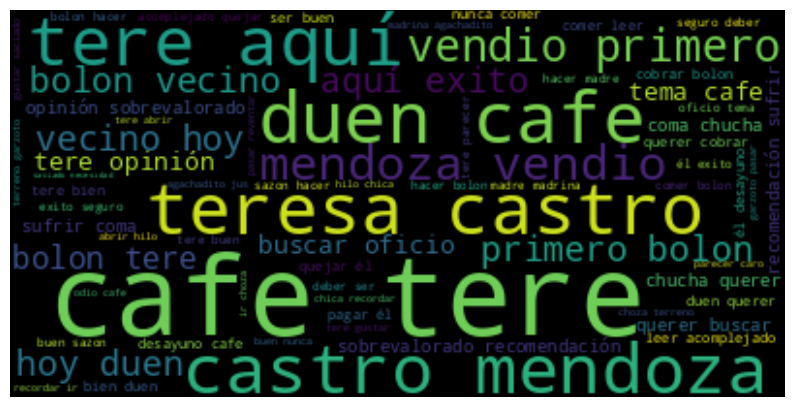

In [16]:
text = " ".join(df.text_processed)
plot_word_cloud(text)

### Saving CSV

In [17]:
df.to_csv(source_path + "cafe_de_tere_flattened.csv")

# Answering questions

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

## Load CSV

In [19]:
df = pd.read_csv(source_path + "cafe_de_tere_flattened.csv")
display(
    df.info(),
    df.head()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4014 non-null   int64  
 1   id                 4014 non-null   int64  
 2   user               4014 non-null   object 
 3   mentions           4014 non-null   object 
 4   count_mentions     4014 non-null   int64  
 5   favourites_count   4014 non-null   int64  
 6   followers_count    4014 non-null   int64  
 7   friends_count      4014 non-null   int64  
 8   location           2902 non-null   object 
 9   place              75 non-null     object 
 10  text               4014 non-null   object 
 11  is_respuesta       4014 non-null   bool   
 12  id_tweet_origen    3061 non-null   float64
 13  user_tweet_origen  3061 non-null   object 
 14  text_processed     4006 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(7)
memory usage: 443.1+ KB


None

,Unnamed: 0,id,user,mentions,count_mentions,favourites_count,followers_count,friends_count,location,place,text,is_respuesta,id_tweet_origen,user_tweet_origen,text_processed
0,0,1192602342434234371,cesar_jurado,['joacosaavedraq'],1,1512,224,397,Guayaquil,NaN,RT @joacosaavedraq: Larga vida al bolón mixto ...,True,1.192197e+18,joacosaavedraq,largo vida bolon mixto maduro tere vida siempr...
1,1,1192600432020996097,donoso_molina,"['FranFerreroMD', 'fraguaciudadana']",2,38,37,28,"Guayas, Ecuador","{'attributes': {}, 'bounding_box': {'coordinat...","@FranFerreroMD @fraguaciudadana Buenas, estima...",False,NaN,NaN,buen estimar creer nacimiento bolon tere remon...
2,2,1192593176378445826,LexyLucin,['Belliiisima89'],1,41,5,119,NaN,NaN,"RT @Belliiisima89: En el Pais de Alvarito, el ...",True,1.192188e+18,Belliiisima89,país alvarito bolon tere ir aceptar tarjeta cr...
3,3,1192585514941112326,Cjvs12,['Mano_Hostil'],1,1556,32,532,"Guayaquil, Ecuador",NaN,RT @Mano_Hostil: Desde la mañana los veo publi...,True,1.192533e+18,Mano_Hostil,manana ver publicar foto ewan gye cada foto me...
4,4,1192583767489204225,DrStrangGuayaco,[],0,4008,5978,1780,MultiVersos,NaN,La verdad hasta ahora no entiendo la joda con ...,False,NaN,NaN,verdad ahora entender jodar bolon tere decir p...


## Question 1: I would like to know which are the 10 most popular tweets (the ones with the most likes or retweets).

In [20]:
df[df.count_mentions>1].id.unique()

array([1192600432020996097, 1192525362728722433, 1192518702501171202,
       1192506528147943424, 1192302824933273600, 1192423559701745664,
       1192295520556998656, 1192291094144393217, 1192290325882114048,
       1192283577825792005, 1192204168599130113, 1192313078051954688,
       1192301178043981825, 1192186345042694145, 1192182984700510209,
       1192177834736922626, 1192224864662425600, 1192195629361123333,
       1192142983761674240, 1192134856186236928, 1192123301491027968,
       1192113369840525317, 1192112462054789120, 1192111346944479237,
       1192186382183215106, 1192186252596039680, 1192103942487982081,
       1192099894355464192, 1192088326779617280, 1192085063984390147,
       1192084587591196672, 1192084280798826496, 1192081445545742336,
       1192134922649112576, 1192109231438286849, 1192095568199397376,
       1192094402073833473, 1192050306399526913, 1192044847231897600,
       1192081892989947905, 1192077707393277952, 1191963508793065477,
       1191954130958

In [21]:
# filtrar por tweets originales (is_respuesta) y verificar si los retweets de 3 de estos tienen el mismo valor de favourites_count

df_p1 = df.loc[df.is_respuesta!=True, ["user", "favourites_count", "text"]].sort_values(by="favourites_count", ascending=False)


[]

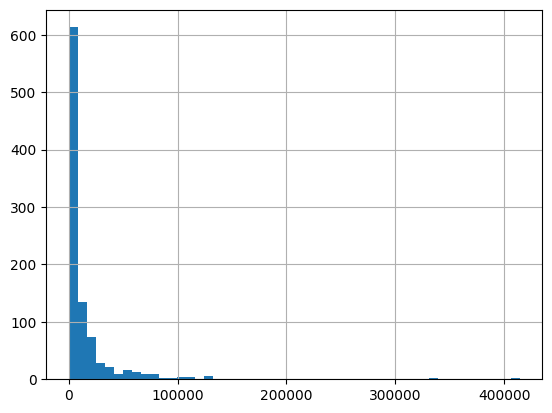

In [22]:
df_p1.favourites_count.hist(bins=50)
plt.plot()

[]

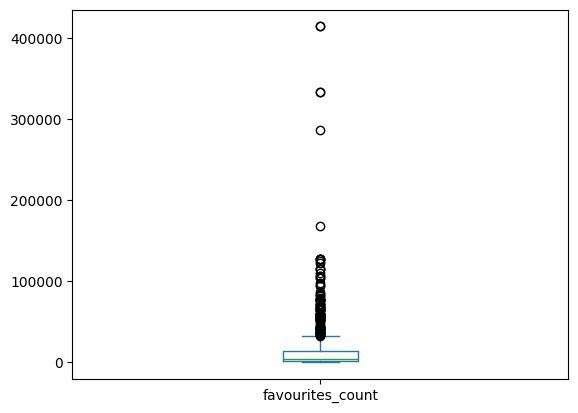

In [23]:
df_p1.favourites_count.plot(kind="box")
plt.plot()

/tmp/ipython-input-2938146011.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


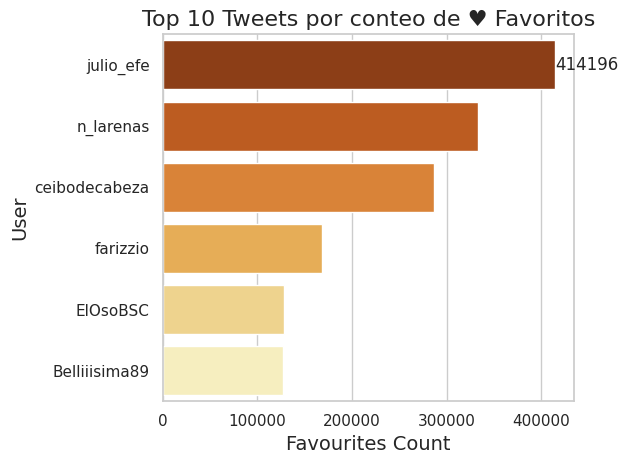

In [24]:
# prompt: Haz un hbar plot con el top de "favourites_count" del dataframe df_p1. Hazlo coloreando las barras en un gradiente secuencial en donde el top 1 sea dorado intenso y el top 10 sea un dorado más suave (un poco más blanco)

import matplotlib.pyplot as plt
import seaborn as sns

# Create the hbar plot with seaborn
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=df_p1.head(10),
    x="favourites_count",
    y="user",
    palette="YlOrBr_r",
    orient="h",
)

# Set the title and labels
ax.set_title("Top 10 Tweets por conteo de ♥ Favoritos", fontdict={"size": 16})
ax.set_xlabel("Favourites Count", fontdict={"size": 14})
ax.set_ylabel("User", fontdict={"size": 14})

# Adjust the spacing between the bars
ax.bar_label(ax.containers[0])
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
# en caso que si...
# filtrar solo los tweets originales (eliminar retweets)


# hacer un HBar plot  de top 10 con color en gradiente secuencial



## Question 2: What are people saying about my brand?

In [26]:
# Elimina todos los registros que en df, en su columna text_processed, tengan Nulo

df = df.dropna(subset=['text_processed'])

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_word_cloud(text, title=None, background_color="black"):
    # Generar el word cloud
    #wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
    wordcloud = WordCloud(background_color=background_color, collocations=False, stopwords=['rt']).generate(text)

    # Crear Figura
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.show()

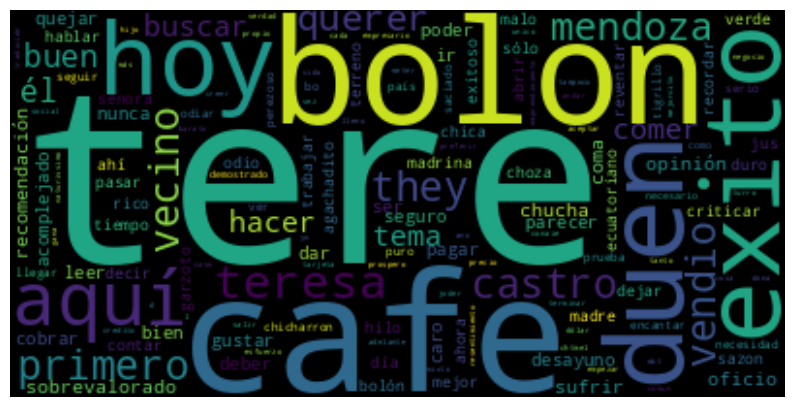

In [28]:
text = " ".join(df.text_processed)
plot_word_cloud(text)

### Colocaciones

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize
import collections
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
all_tokens = []
for single_tweet in df.loc[:, "text_processed"].values:
    tokens = word_tokenize(single_tweet)
    all_tokens += tokens
counter = collections.Counter(all_tokens)
print(counter)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


#### Bigrams

##### Create Data

In [ ]:
def get_bigrams_info(window_size, score_method=None):
    print('Inicializando...', end='')
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder\
                                    .from_words(all_tokens,
                                                window_size=window_size
                                                )
    print('\r', end='')
    print('Scoring Bigrams...', end='')
    r_bigrams = list(bigramFinder.score_ngrams(
        # este es el método de cálculo
        bigrams.raw_freq if score_method is None else score_method
        #otros métodos por ejemplo:
        #bigrams.chi_sq
        # los otros métodos suelen funcionar mejor con más datos
        )
    )
    r_bigrams = sorted(r_bigrams, key=lambda tup: tup[1], reverse=True)
    r_bigrams_scored = r_bigrams[0:50]
    best_ngrams = list(bigramFinder.nbest(bigrams.raw_freq, 50))

    ctn = np.array([score for _,score in r_bigrams_scored]).sum()
    print('\r', end='')
    words, scores, percents = [], [], []
    for (x,y),score in tqdm(r_bigrams_scored, desc='Guardando'):
        words.append(x + " - " + y)
        scores.append(score)
        percents.append(round(100*score/ctn, 1))

    return words, scores, percents


In [ ]:
# Crea un dataframe de bigrams

df_bigrams = pd.DataFrame()
for i in tqdm(range(3, 9)):
  words, scores, percents = get_bigrams_info(i)
  df_bigrams[f"words_{i}"] = words
  df_bigrams[f"scores_{i}"] = scores
  df_bigrams[f"percents_{i}"] = percents

display(df_bigrams)

In [ ]:
# Save data of bigrams
df_bigrams.to_csv(source_path+'data_bigrams.csv', index=False)


##### Visualize Bigrams

In [ ]:
df_bigrams = pd.read_csv(source_path+'data_bigrams.csv')

In [ ]:
# prompt: Grafica 6 subplots (2 columnas y 3 filas) quiero que en cada uno hagas un gráfico de barras con el top 10 colocaciones con más porcentaje. Cada subplot va a tener un gráfico de barras de un window_size. Recuerda que las columnas del dataframe tienen el siguiente formato: words_{i}, scores_{i}, percents_{i}. Haz el gráfico de barras en orden descendente y con 'words_i' en los label del eje y

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

for i, ax in enumerate(axes.flat):
    data = df_bigrams.loc[:, df_bigrams.columns[i*3:(i+1)*3]]
    data = data.sort_values(by=f"percents_{i+3}", ascending=False).head(10)
    sns.barplot(data=data,
                ax=ax,
                x=f"percents_{i+3}",
                y=f"words_{i+3}",
                palette="YlOrBr_r"
                )
    ax.set_title(f"Window Size: {i+3}")
    ax.set_xlabel("Percentage")
    #ax.set_ylabel("Words")

plt.tight_layout()
plt.show()


#### Trigrams

##### Create Data

In [ ]:
def get_trigrams_info(window_size, score_method=None):
    trigrams = nltk.collocations.TrigramAssocMeasures()
    trigramFinder = nltk.collocations.TrigramCollocationFinder\
                                     .from_words(all_tokens,
                                                 window_size=window_size
                                                 )
    print('\r', end='')
    print('Scoring Bigrams...', end='')
    trigrams_scored = list(trigramFinder.score_ngrams(
        trigrams.raw_freq if score_method is None else score_method
        )
    )
    #best_trigrams = list(trigramFinder.nbest(trigrams.raw_freq, 50))
    trigrams_scored = sorted(trigrams_scored, key=lambda tup: tup[1], reverse=True)
    trigrams_scored = trigrams_scored[0:50]

    #ctn = 0
    #for (x,y,z),score in trigrams_scored:
    #    ctn += score
    ctn = np.array([score for _,score in trigrams_scored]).sum()
    print('\r', end='')

    results_trigrams = {}
    words, scores, percents = [], [], []
    for (x,y,z),score in tqdm(trigrams_scored):
        words.append(x + "_" + y + "_" + z)
        scores.append(score)
        percents.append(round(100*score/ctn, 1))

    return words, scores, percents

In [ ]:
# Crea un dataframe de bigrams

df_trigrams = pd.DataFrame()
for i in tqdm(range(4, 10)):
  words, scores, percents = get_trigrams_info(window_size=i)
  df_trigrams[f"words_{i}"] = words
  df_trigrams[f"scores_{i}"] = scores
  df_trigrams[f"percents_{i}"] = percents

display(df_trigrams)

In [ ]:
# Save data of bigrams
df_trigrams.to_csv(source_path+'data_trigrams.csv', index=False)


##### Visualize Bigrams

In [ ]:
df_trigrams = pd.read_csv(source_path+'data_trigrams.csv')

In [ ]:
# prompt: Grafica 6 subplots (2 columnas y 3 filas) quiero que en cada uno hagas un gráfico de barras con el top 10 colocaciones con más porcentaje. Cada subplot va a tener un gráfico de barras de un window_size. Recuerda que las columnas del dataframe tienen el siguiente formato: words_{i}, scores_{i}, percents_{i}. Haz el gráfico de barras en orden descendente y con 'words_i' en los label del eje y

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

for i, ax in enumerate(axes.flat):
    data = df_trigrams.loc[:, df_trigrams.columns[i*3:(i+1)*3]]
    data = data.sort_values(by=f"percents_{i+4}", ascending=False).head(10)
    sns.barplot(data=data,
                ax=ax,
                x=f"percents_{i+4}",
                y=f"words_{i+4}",
                palette="YlOrBr_r"
                )
    ax.set_title(f"Window Size: {i+4}")
    ax.set_xlabel("Percentage")
    #ax.set_ylabel("Words")

plt.tight_layout()
plt.show()


## Question 5: What are the most relevant themes in the messages? Is it product quality? Prices? Service? What’s new?”

In [ ]:
# Delete all records in df whose text_processed column has a null value.

df = df.dropna(subset=['text_processed'])

In [ ]:
#@title Visualize words in the tweets.
for elem in np.unique(text.split()): print(elem)

In [ ]:
#@title categorías seleccionadas
categorias = {
"costo": ["valor", "afrentoso", "barato", "costo", "caro", "excesivo", "carisimo", "cobro", "cobrar", "consumismo", "dinero", "efectivo", "gasto", ],
"servicio al cliente": ["agradable", "amargado", "amistad", "amor", "amiga", "atender", "bruja", "domicilio", "esperar", "feliz", "felicita", "frustración",
                        ],
"variedad": ["actualizar", "agregar", "autentico", "categoria", "combinacion", ],
"producto": ["producto", "cafe", "bolon", "aji", "ajicero", "alita", "aroma", "asqueroso", "azucar", "basura", "bello", "bien", "bolón", "bonito", "buenisimo", "calidad",
             "caloria", "cangrejo", "categoria", "ceviches", "ceviche", "chicharron", "comi", "comida", "criolla", "criollo", "desayu", "destilado", "empanada",
             "encebollado", "entretiempo", "estomago", "expreso", "fernet", "fototrampa", "gastronomia", "gastronomico", "gourmet", "hamburguesa", "horrible", "intenso",
            "jamom", "jamón"]

}



```
# This is formatted as code
```

### Number of tweets per category

In [ ]:
# prompt: en base al diccionario de categorías. Quiero que me cuentes la cantidad de textos dentro de text_processed que pertenecen a cierta categoría, ten en cuenta que un mismo texto puede pertenecer a más de una categoría. El criterio de asignación va a ser si al menos una palabras dentro de la lista que está como valor de las claves del diccionario está dentro del texto, ese texto es de esa categoria.

def count_texts_by_category(df, categories):
  category_counts = {}
  for category, keywords in categories.items():
    category_count = 0
    for text in df["text_processed"]:
      if any(keyword in text for keyword in keywords):
        category_count += 1
    category_counts[category] = category_count
  return category_counts

category_counts = count_texts_by_category(df, categorias)

for category, count in category_counts.items():
  print(f"Category: {category}, Count: {count}")


In [ ]:
# Sort the data by count
sorted_categories = sorted(category_counts.items(), key=lambda item: item[1], reverse=True)

# Crear el bar plot
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    x=[count for _, count in sorted_categories],
    y=[category for category, _ in sorted_categories],
    palette="YlOrBr_r",
)

ax.set_title("Categorías de comentarios", fontdict={"size": 16})
ax.set_xlabel("Número de comentarios", fontdict={"size": 14})
ax.set_ylabel("Categoría", fontdict={"size": 14})

# Ajuste del espacio entre barras
ax.bar_label(ax.containers[0])
plt.tight_layout()


plt.show()


In [ ]:
# Agrega una columna por categoría y poner "flags" de si pertenece o no pertenece a dicho grupo

for category, keywords in categorias.items():
  df[category] = df["text_processed"].apply(lambda text: any(keyword in text for keyword in keywords))

display(
    df
)

In [ ]:
df.loc[:, ['costo', 'servicio al cliente', 'variedad', 'producto']].sum()

### Sentiment analysis by category

In [ ]:
!pip install sentiment-analysis-spanish

In [ ]:
# Calcular el sentimiento por tweet
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()
df["sentiment"] = df["text_processed"].apply(sentiment.sentiment)
df


In [ ]:
#Histograma del análisis de sentimientos encontrado
df.sentiment.hist(bins=20)

In [ ]:
# Discretizando
# -1: Negativo
#  0: Neutral
#  1: Positivo
df["sentiment"] = df["sentiment"].apply(lambda x: -1 if (x>=0 and x<=0.35) else 0 if (x>0.35 and x<0.65) else 1)
df.sentiment.hist()


In [ ]:
dict_df = {
    "category": [],
    "sentiment": [],
    "count": []
}

for cat in ["costo", "servicio al cliente", "variedad", "producto"]:
    df_grouped = df.loc[df[cat]==True, [cat, "sentiment"]].groupby("sentiment")[cat].sum()
    counts_forthis_cat = df_grouped.to_list()
    sentiment_values = list(df_grouped.index)
    vat_value = [cat]*len(counts_forthis_cat)
    dict_df['category'] += vat_value
    dict_df['sentiment'] += sentiment_values
    dict_df['count'] += counts_forthis_cat

df_sentiment = pd.DataFrame(dict_df)
df_sentiment

In [ ]:
#@title Viz Sentiments by Category

sns.set_theme(style="whitegrid")

# Crear el stacked bar plot
ax = sns.barplot(
    data=df_sentiment,
    x="category",
    y="count",
    hue="sentiment",
    palette="viridis",
    orient='v',
)

# Configurar viz
ax.set_title("Sentiment by Category", fontdict={"size": 16})
ax.set_xlabel("Categoría", fontdict={"size": 14})
ax.set_ylabel("N° tweets", fontdict={"size": 14})
ax.legend(labels=["Negativo", "Neutral", "Positivo"], handles=ax.get_legend().legend_handles, labelspacing=0.2)
plt.show()

In [ ]:
# prompt: Ahora quiero que hagas un stacked bar plot. Las barras quiero que sean por categoría y el stack por el "sentiment"

import matplotlib.pyplot as plt
df_sentiment = df.groupby(["costo", "servicio al cliente", "variedad", "producto", "sentiment"], as_index=False).agg(
    sentiment_count=("sentiment", "count")
)

df_sentiment = df_sentiment.pivot_table(
    index=["costo", "servicio al cliente", "variedad", "producto"],
    columns="sentiment",
    values="sentiment_count",
    aggfunc="sum",
    fill_value=0,
).reset_index()

df_sentiment["total"] = df_sentiment.iloc[:, -1] + df_sentiment.iloc[:, -2] + df_sentiment.iloc[:, -3]

df_sentiment_sorted = df_sentiment.sort_values(by="total", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 4))

sns.barplot(
    x=df_sentiment_sorted.total,
    y=df_sentiment_sorted.loc[:, ["costo", "servicio al cliente", "variedad", "producto"]],
    hue="sentiment",
    #data=df_sentiment_sorted.loc[:, ["costo", "servicio al cliente", "variedad", "producto"]],
    palette=["red", "yellow", "green"],
)

ax.set_title("Categorías de comentarios por sentimiento", fontdict={"size": 16})
ax.set_xlabel("Número de comentarios", fontdict={"size": 14})
ax.set_ylabel("Categoría", fontdict={"size": 14})

# Ajuste del espacio entre barras
ax.bar_label(ax.containers[0])
plt.tight_layout()

plt.show()


In [ ]:
import plotly.graph_objects as go

In [ ]:
dict_df

In [ ]:
# Renombrar los valores de sentiment por:
# -1: Negativo
# 0: Neutral
# 1: Positivo

df_sentiment["sentiment"] = df_sentiment["sentiment"].apply(lambda x: "Negativo" if x==-1 else "Neutral" if x==0 else "Positivo")


In [ ]:
df_sentiment.head()

In [ ]:
!pip install --upgrade holoviews panel

In [ ]:
df_sentiment["sentiment"] = df_sentiment["sentiment"].apply(lambda x: "Negativo" if x==-1 else "Neutral" if x==0 else "Positivo")

In [ ]:
# prompt: Haciendo uso de la librería holoviews, haz un sankey plot con la data de dict_df. Aquí solo tienes un "source" que sería el category y un "target" que sería el sentiment

import holoviews as hv


node_colors = {
    'costo': 'red',
    'servicio al cliente': 'dodgerblue',
    'variedad': 'green',
    'producto': 'yellow',
    'Positivo': 'gold',
    'Neutral': 'grey',
    'Negativo': 'darkviolet',
}

# Create a HoloViews Sankey object
#sankey = hv.Sankey(dict_df, vdims=["category", "sentiment"], kdims=["count"])
hv.extension('bokeh')
sankey = hv.Sankey(
    df_sentiment,
    kdims=["category", "sentiment"],
    vdims='count',
    label='Café de Tere - Sentiment by Category'
    )
'''
sankey.opts(label_position='left',
            edge_color='source',
            node_color='index',
            #cmap='tab20'
            )
'''
#nodes = pd.DataFrame(list(node_colors.items()), columns=['index', 'color'])
#hv.Dataset(nodes, 'index')
'''
sankey.opts(
    label_position='left',
    edge_color='source',
    node_color='color',
    node_cmap=node_colors
)
'''
sankey.opts(
    label_position='left',
    #node_color=node_colors,
    edge_color=hv.dim('category').categorize(node_colors),
    #cmap='Category20',
    cmap=node_colors,
    node_alpha=1.0,
    edge_alpha=0.95
)

# Display the Sankey plot
hv.output(sankey)


In [ ]:
# prompt: Haz que en el sankeyplot, los colores de cada rama sean del color del nodo origen y selecciona manualmente los colores de los nodos de source y target. Usa transform_reference

# Create a HoloViews Sankey object
#sankey = hv.Sankey(dict_df, vdims=["category", "sentiment"], kdims=["count"])
hv.extension('bokeh')
sankey = hv.Sankey(
    df_sentiment.rename(
        columns={'category': "source", 'sentiment':'target', 'count':'value'}
    ),
    label='Café de Tere - Sentiment by Category'
    )
sankey.opts(label_position='left',
            edge_color='source',
            node_color='index',
            cmap='tab20'
            )
sankey = sankey.transform_reference('source', color='Category20')
sankey = sankey.transform_reference('target', color=['red', 'yellow', 'green'])

# Display the Sankey plot
sankey


In [ ]:
# prompt: haz un sankey plot con la data de dict_df. Aquí solo tienes un "source" que sería el category y un "target" que sería el sentiment

import plotly.graph_objects as go

# Create the Sankey diagram
fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=dict_df["category"],
            ),
            link=dict(
                source=dict_df["category"],
                target=dict_df["sentiment"],
                value=dict_df["count"],
            ),
        )
    ]
)

# Configure the layout
fig.update_layout(
    title="Sankey Plot of Categories and Sentiments",
    font=dict(size=10),
)

# Display the Sankey diagram
fig.show()


In [ ]:
import plotly.graph_objects as go
#link = dict(source = source, target = target, value = value)
data = go.Sankey(link = dict_df)

fig = go.Figure(data=[
    go.Sankey(
        valueformat = ".0f",
        valuesuffix = "TWh",
        link = dict_df,
        )
])
fig.show()


url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)